### Required Libraries

In [114]:
%pip install seaborn
%pip install matplotlib
%pip install pandas
%pip install numpy
%pip install scikit-learn
%pip install scipy
%pip install --upgrade matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated pa

### Importing Libraries and Dataset

In [115]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np

In [116]:
leco_all = pd.DataFrame()
root_folder = '/lirneasia/data/lacuna/processed/sm_april_2024_dump'
directory = os.path.join(root_folder)

if os.path.exists(directory):
    files = os.listdir(directory)

    for file_name in files:
        if file_name.endswith('.csv'):
            file_path = os.path.join(root_folder, file_name)
                
            leco_data = pd.read_csv(file_path, low_memory=False)

            leco_all = pd.concat([leco_all, leco_data], ignore_index=False)

else:
    print("path wrong") 

survey_data = pd.read_csv('/lirneasia/data/lacuna/raw/Survey_data/Survey_wave_1_may_29.csv', low_memory=False)

### Data Processing

In [117]:
leco_all['datetime'] = pd.to_datetime(leco_all['date'] + ' ' + leco_all['time'])
leco_all = leco_all.drop(columns=['date', 'time'])
leco_all = leco_all.sort_values(by=['customerref', 'datetime'])

In [118]:
leco_all['consumption'] = leco_all.groupby('customerref')['importkwh(kwh)'].diff().fillna(0)
leco_all['export'] = leco_all.groupby('customerref')['exportkwh(kwh)'].diff().fillna(0)

leco_all = leco_all[leco_all['consumption'] >= 0]
leco_all = leco_all[leco_all['export'] >= 0]

In [119]:
#Monthly consumption
monthly_consumption = leco_all.set_index('datetime').groupby('customerref')['consumption'].resample('ME').sum().reset_index()

In [120]:
monthly_consumption.tail(20)

,customerref,datetime,consumption
5214,708250510,2024-01-31,34.2040
5215,708311604,2023-10-31,2.8380
5216,708311604,2023-11-30,29.9680
5217,708311604,2023-12-31,12.5570
5218,708311604,2024-01-31,19.7031
5219,708358409,2023-10-31,65.3900
5220,708358409,2023-11-30,135.7240
5221,708446805,2023-10-31,36.1950
5222,708446805,2023-11-30,317.1450
5223,708446805,2023-12-31,131.6760


In [121]:
monthly_consumption = monthly_consumption[monthly_consumption['datetime'] == '2023-11-30']
monthly_consumption

,customerref,datetime,consumption
1,101261710,2023-11-30,100.1420
5,101490906,2023-11-30,90.9220
9,101502005,2023-11-30,100.4509
13,101837010,2023-11-30,57.2870
17,103091604,2023-11-30,29.0810
...,...,...,...
5220,708358409,2023-11-30,135.7240
5222,708446805,2023-11-30,317.1450
5225,708512409,2023-11-30,72.7050
5228,708773307,2023-11-30,0.0000


In [122]:
sm = leco_all.drop_duplicates(subset=['customerref'])
merged = pd.merge(sm, survey_data, left_on='customerref', right_on='ACCOUNT_NO', how='inner')

In [123]:
merged = pd.merge(merged, monthly_consumption, left_on='customerref', right_on='customerref', how='inner')
merged

,serial,customerref,timestamp,obis,importkwh(kwh),exportkwh(kwh),importkvarh(kvarh),exportkvarh(kvarh),phaseainstcurrent(a),phasebinstcurrent(a),...,Sawing_Machine_availability,Wood_Chipping_Machine_availability,Concrete_Mixture_Machine_availability,Hair_Cutting_Machine_availability,Generator_Battery_availability,Bouth_availability,Grill_availability,LA_Unique_ID,datetime_y,consumption_y
0,22732556,101261710,1.698520e+12,LP,139.232,0.0000,NaN,NaN,0.4121,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10101261710,2023-11-30,100.1420
1,21721253,200134110,1.698550e+12,LP,1574.864,3412.9090,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10200134110,2023-11-30,135.2330
2,20708313,200700907,1.698530e+12,LP,3508.694,15727.3080,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10200700907,2023-11-30,132.1351
3,20708610,201661801,1.698540e+12,LP,2774.710,7651.4091,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10201661801,2023-11-30,136.9181
4,21721146,201929002,1.698550e+12,LP,2591.833,0.0010,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10201929002,2023-11-30,141.3410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,22730366,707123802,1.698530e+12,LP,33.020,0.0010,NaN,NaN,0.2320,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10707123802,2023-11-30,29.9420
280,23706149,707182311,1.697080e+12,LP,0.000,0.0000,NaN,NaN,0.0270,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10707182311,2023-11-30,245.9330
281,22729794,707436301,1.698530e+12,LP,292.258,0.0000,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10707436301,2023-11-30,144.8160
282,22711706,708512409,1.698540e+12,LP,373.652,0.0000,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10708512409,2023-11-30,72.7050


In [124]:
merged.columns = merged.columns.str.strip().str.lower().str.replace(' ', '_')

In [125]:
# Handling erroneous data
merged = merged[merged['w1_h_4'] <= 5000000]
merged = merged[merged['w1_b_8'] <= 20000]
merged['w1_b_7'] = merged['w1_b_7'].replace(' ', 0)
merged['w1_b_7'] = merged['w1_b_7'].astype(int)
merged['w1_h_4'] = merged['w1_h_4'].replace(3500000, 350000)

merged['totroomoth'] = merged['totroomoth'].replace(' ', 0)
merged['totroomoth'] = merged['totroomoth'].astype(int)
merged['totroom'] = merged['totroom'] + merged['totroomoth']
merged = merged[merged['totroom'] <= 30]


In [126]:
categorical_features = ['occ', 'edu']

numerical_features = ['w1_b_7', 'w1_h_4', 'w1_c_1', 'w1_b_8', 'totroom']

for column in numerical_features:
    merged[column] = pd.to_numeric(merged[column], errors='coerce')

# Handle specific non-numeric entries
merged['w1_b_7'] = merged['w1_b_7'].replace(' ', np.nan)

# Drop rows with NaN values or fill them with mean/median
merged = merged.dropna(subset=numerical_features)

# Forward fill and backward fill missing values
merged = merged.ffill().bfill()

# Additional cleaning step to ensure no empty strings in categorical columns
merged[categorical_features] = merged[categorical_features].replace(' ', np.nan).ffill().bfill()

# Define the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Transform the data
transformed_features = preprocessor.fit_transform(merged)

# Check the transformed features
print(transformed_features)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 1624 stored elements and shape (232, 25)>
  Coords	Values
  (0, 0)	-0.1930228591205457
  (0, 1)	0.08383221630861093
  (0, 2)	1.0118751790313356
  (0, 3)	-0.6082830606165773
  (0, 4)	-0.2046672089461345
  (0, 6)	1.0
  (0, 22)	1.0
  (1, 0)	6.524172638274444
  (1, 1)	-0.9710957622337141
  (1, 2)	-1.1174222498600013
  (1, 3)	-0.6733041028498274
  (1, 4)	-0.7945155626790937
  (1, 14)	1.0
  (1, 20)	1.0
  (2, 0)	-0.1930228591205457
  (2, 1)	-0.6833881317221708
  (2, 2)	-1.1174222498600013
  (2, 3)	-0.7383251450830774
  (2, 4)	-1.384363916412053
  (2, 13)	1.0
  (2, 21)	1.0
  (3, 0)	-0.1930228591205457
  (3, 1)	2.481395803904804
  (3, 2)	-0.05277353541433288
  (3, 3)	1.4723902908474251
  :	:
  (228, 3)	-1.128451398482578
  (228, 4)	-1.0894397395455735
  (228, 8)	1.0
  (228, 23)	1.0
  (229, 0)	-0.1930228591205457
  (229, 1)	0.08383221630861093
  (229, 2)	-0.05277353541433288
  (229, 3)	-0.2181568072170769
  (229, 4)	-0.204667208946134

### Clustering

In [127]:
'''
consumption_y - Monthly consumption
w1_b_7 - No. of storeys
w1_h_4 - Household expenses for last month
w1_c_1 - No of household memebers
w1_b_8 - floor area of the house
totroom  - Number of rooms
occ - Occupation of the chief wage earner
    occupation_mapping = {
    'Unskilled Worker': 1,
    'Skilled Worker': 2,
    'Clerk / Salesman grades': 3,
    'Supervisor grades': 4,
    'Junior executive / Executive': 5,
    'Middle and Senior executive': 6,
    'Manager / Professional': 7,
    'Small Businessman / Self employed (Non professional)': 8,
    'Boutique owner': 9,
    'Self employed (Professional) - No employees': 10,
    '1-9 Employed': 11,
    '10+ Employed': 12,
    'Agricultural labourer / Worker': 13,
    'Tenant cultivator': 14,
    'Farmer owning - Less than ½ Acre': 15,
    'Farmer owning - ½ - 1 / Acre': 16,
    'Farmer owning - 1 - 2 / Acre': 17,
    'Farmer owning - 2 - 5 / Acre': 18,
    'Farmer owning - Over 5 acres / Landed proprietor': 19
}

edu - Highest level of education attained by the chief wage earner
    education_mapping = {
        'Illiterate': 1,
        'Primary Education': 2,
        'Schooling upto Grade 6 - 9': 3,
        'O/L or A/L pending / Passed': 4,
        'Diploma with O/L or A/L (Non graduate)': 5,
        'Other professional certificates with O/L or A/L / Part qualification (Non graduate)': 6,
        'Graduate /Post-Grads/ Degree level professional qualification': 7
    }

'''

"\nconsumption_y - Monthly consumption\nw1_b_7 - No. of storeys\nw1_h_4 - Household expenses for last month\nw1_c_1 - No of household memebers\nw1_b_8 - floor area of the house\ntotroom  - Number of rooms\nocc - Occupation of the chief wage earner\n    occupation_mapping = {\n    'Unskilled Worker': 1,\n    'Skilled Worker': 2,\n    'Clerk / Salesman grades': 3,\n    'Supervisor grades': 4,\n    'Junior executive / Executive': 5,\n    'Middle and Senior executive': 6,\n    'Manager / Professional': 7,\n    'Small Businessman / Self employed (Non professional)': 8,\n    'Boutique owner': 9,\n    'Self employed (Professional) - No employees': 10,\n    '1-9 Employed': 11,\n    '10+ Employed': 12,\n    'Agricultural labourer / Worker': 13,\n    'Tenant cultivator': 14,\n    'Farmer owning - Less than ½ Acre': 15,\n    'Farmer owning - ½ - 1 / Acre': 16,\n    'Farmer owning - 1 - 2 / Acre': 17,\n    'Farmer owning - 2 - 5 / Acre': 18,\n    'Farmer owning - Over 5 acres / Landed proprietor':

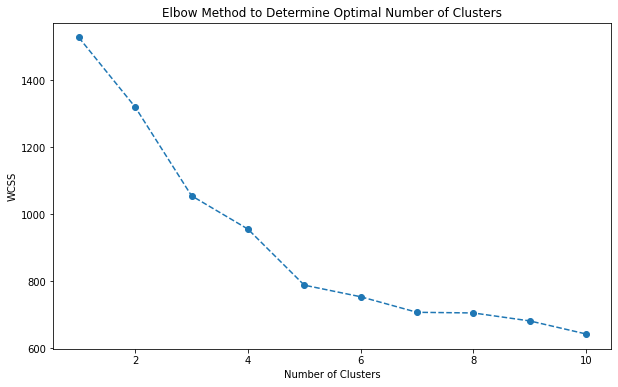

In [128]:
#Elbow Method

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(transformed_features)
    wcss.append(kmeans.inertia_)

# Graph: Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method to Determine Optimal Number of Clusters')
plt.show()

#### 3 Clusters

In [129]:
kmeans_1 = KMeans(n_clusters=3, random_state=42)
y_kmeans_1 = kmeans_1.fit_predict(transformed_features)
merged['3Cluster'] = y_kmeans_1

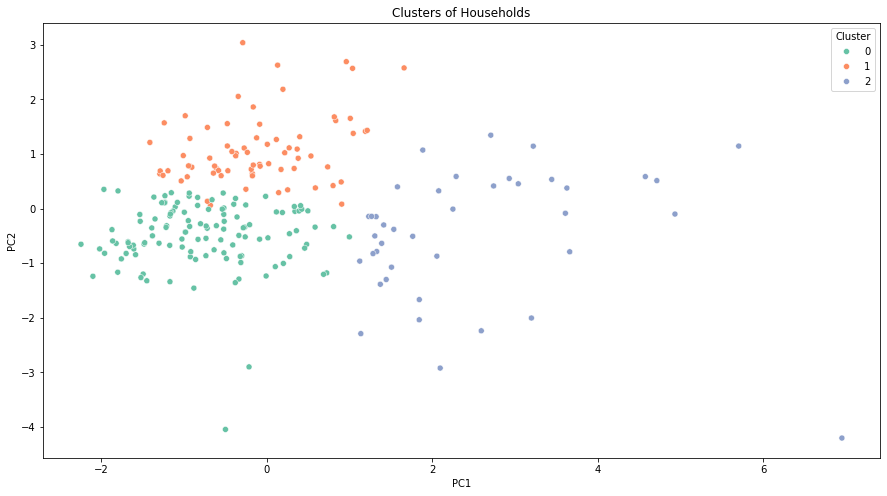

In [130]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(transformed_features)
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
df_pca['Cluster'] = y_kmeans_1

plt.figure(figsize=(15, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_pca, palette='Set2')
plt.title('Clusters of Households')
plt.show()

In [131]:
import plotly.express as px
import pandas as pd
from sklearn.decomposition import PCA

# Assuming y_kmeans and transformed_features are already defined

# Perform PCA to reduce dimensions to 3
pca = PCA(n_components=3)
principal_components = pca.fit_transform(transformed_features)

# Create a DataFrame with the principal components and cluster labels
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])
df_pca['Cluster'] = y_kmeans_1

# Plot the 3D scatter plot using Plotly
fig = px.scatter_3d(df_pca, x='PC1', y='PC2', z='PC3', color='Cluster', title='3D Scatter Plot of Clusters')

# Show the plot
fig.show()

In [132]:
cluster_summary_1 = merged.groupby('3Cluster')[numerical_features].mean().round(2)
cluster_summary_1

,w1_b_7,w1_h_4,w1_c_1,w1_b_8,totroom
3Cluster,,,,,
0,0.05,50016.65,2.81,687.84,6.60
1,0.03,70916.67,6.18,725.74,6.94
2,0.30,131950.00,4.22,2243.15,12.32


In [133]:
cluster_summary_1 = merged.groupby('3Cluster')[numerical_features].size()
cluster_summary_1

3Cluster
0    120
1     72
2     40
dtype: int64

#### 4 Clusters

In [134]:
kmeans_2 = KMeans(n_clusters=4, random_state=42)
y_kmeans_2 = kmeans_2.fit_predict(transformed_features)
merged['4Cluster'] = y_kmeans_2

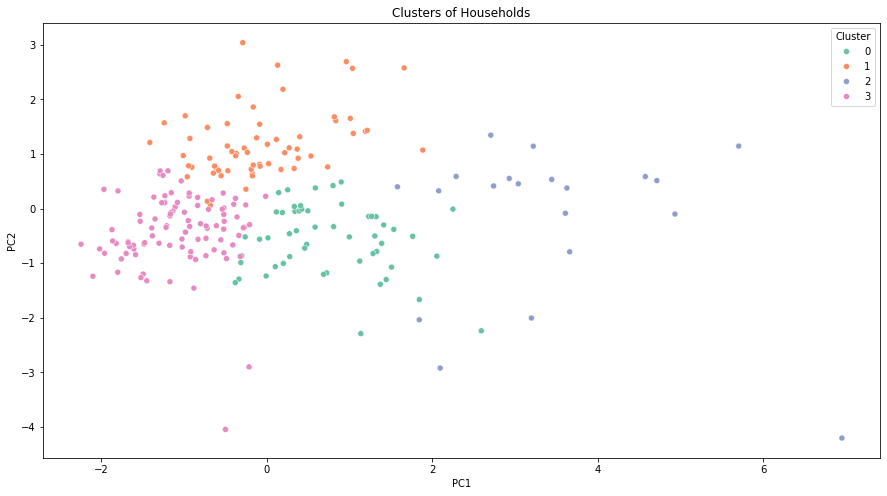

In [135]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(transformed_features)
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
df_pca['Cluster'] = y_kmeans_2

plt.figure(figsize=(15, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_pca, palette='Set2')
plt.title('Clusters of Households')
plt.show()

In [136]:
import plotly.express as px
import pandas as pd
from sklearn.decomposition import PCA

# Assuming y_kmeans and transformed_features are already defined

# Perform PCA to reduce dimensions to 3
pca = PCA(n_components=3)
principal_components = pca.fit_transform(transformed_features)

# Create a DataFrame with the principal components and cluster labels
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])
df_pca['Cluster'] = y_kmeans_2

# Plot the 3D scatter plot using Plotly
fig = px.scatter_3d(df_pca, x='PC1', y='PC2', z='PC3', color='Cluster', title='3D Scatter Plot of Clusters')

# Show the plot
fig.show()

In [137]:
cluster_summary_2 = merged.groupby('4Cluster')[numerical_features].mean().round(2)
cluster_summary_2

,w1_b_7,w1_h_4,w1_c_1,w1_b_8,totroom
4Cluster,,,,,
0,0.02,67415.09,3.26,1568.87,9.98
1,0.03,74290.32,6.40,710.53,6.97
2,0.55,191750.00,5.00,2219.80,13.50
3,0.06,45072.14,2.90,545.58,5.71


In [138]:
cluster_summary_2 = merged.groupby('4Cluster')[numerical_features].size()
cluster_summary_2

4Cluster
0    53
1    62
2    20
3    97
dtype: int64

### Finding Outliers

In [139]:
cluster0 = merged[merged['3Cluster'] == 0]
cluster1 = merged[merged['3Cluster'] == 1]
cluster2 = merged[merged['3Cluster'] == 2]
# cluster3 = merged[merged['4Cluster'] == 3]

##### Cluster 0

In [140]:
# Mean electricity consumption for cluster0
cluster0_mean = cluster0['consumption_y'].mean().round(2)
cluster0_mean

73.13

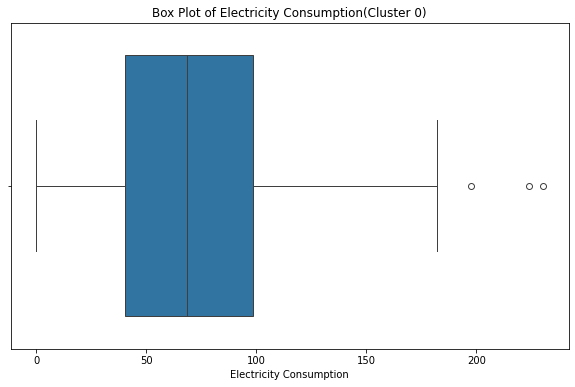

In [141]:
cluster0_cons = cluster0['consumption_y']

plt.figure(figsize=(10, 6))

sns.boxplot(x='consumption_y', data=cluster0)

plt.title('Box Plot of Electricity Consumption(Cluster 0)')
plt.xlabel('Electricity Consumption')

plt.show()

In [142]:
# Finding Outliers by IQR
Q1 = cluster0_cons.quantile(0.25)
Q3 = cluster0_cons.quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers0 = cluster0[(cluster0_cons < lower_bound) | (cluster0_cons > upper_bound)]

print(f"Lower bound for outliers: {lower_bound}")
print(f"Upper bound for outliers: {upper_bound}")
outliers0


Lower bound for outliers: -47.201299999999904
Upper bound for outliers: 185.83369999999988


,serial,customerref,timestamp,obis,importkwh(kwh),exportkwh(kwh),importkvarh(kvarh),exportkvarh(kvarh),phaseainstcurrent(a),phasebinstcurrent(a),...,concrete_mixture_machine_availability,hair_cutting_machine_availability,generator_battery_availability,bouth_availability,grill_availability,la_unique_id,datetime_y,consumption_y,3Cluster,4Cluster
22,20708496,210072610,1.698530e+12,LP,5995.870,0.0,324.644,236.1080,0.139,1.796,...,0.0,0.0,0.0,0.0,0.0,10210072610,2023-11-30,230.383,0,0
24,20708530,211015409,1.698540e+12,LP,4176.482,0.0,324.644,236.1080,0.139,1.796,...,0.0,0.0,0.0,0.0,0.0,10211015409,2023-11-30,197.416,0,0
218,19729210,309232308,1.698520e+12,LP,7148.968,0.0,378.798,2451.7961,8.510,17.099,...,0.0,0.0,0.0,0.0,0.0,10309232308,2023-11-30,224.015,0,0


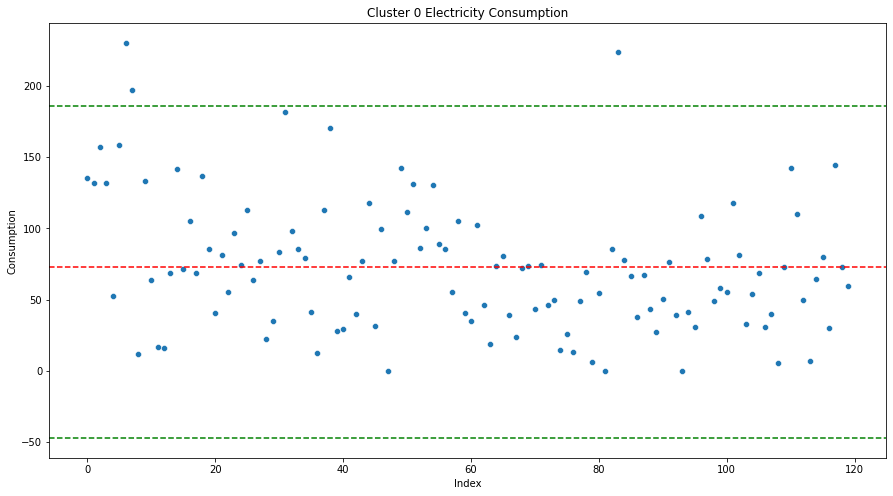

In [143]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x=range(len(cluster0)), y='consumption_y', data=cluster0)
plt.axhline(y=cluster0_mean, color='r', linestyle='--', label=f'Mean Consumption ({cluster0_mean})')
plt.axhline(y=lower_bound, color='g', linestyle='--', label=f'Lower Bound ({lower_bound})')
plt.axhline(y=upper_bound, color='g', linestyle='--', label=f'Upper Bound ({upper_bound})')
plt.title('Cluster 0 Electricity Consumption')
plt.xlabel('Index')
plt.ylabel('Consumption')
plt.show()

##### Cluster 1

In [144]:
cluster1_mean = cluster1['consumption_y'].mean().round(2)
cluster1_mean

101.8

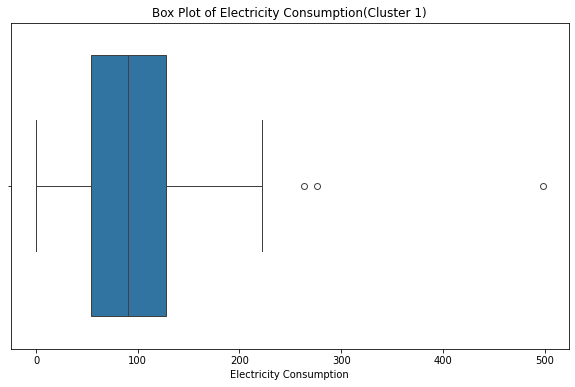

In [145]:
cluster1_cons = cluster1['consumption_y']

plt.figure(figsize=(10, 6))

sns.boxplot(x='consumption_y', data=cluster1)

plt.title('Box Plot of Electricity Consumption(Cluster 1)')
plt.xlabel('Electricity Consumption')

plt.show()

In [146]:
Q1 = cluster1_cons.quantile(0.25)
Q3 = cluster1_cons.quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers1 = cluster1[(cluster1_cons < lower_bound) | (cluster1_cons > upper_bound)]

print(f"Lower bound for outliers: {lower_bound}")
print(f"Upper bound for outliers: {upper_bound}")
outliers1

Lower bound for outliers: -57.12250000000029
Upper bound for outliers: 238.58150000000035


,serial,customerref,timestamp,obis,importkwh(kwh),exportkwh(kwh),importkvarh(kvarh),exportkvarh(kvarh),phaseainstcurrent(a),phasebinstcurrent(a),...,concrete_mixture_machine_availability,hair_cutting_machine_availability,generator_battery_availability,bouth_availability,grill_availability,la_unique_id,datetime_y,consumption_y,3Cluster,4Cluster
64,22703452,301401606,1.698530e+12,LP,2295.351,2052.051,503.7511,3548.1470,0.295,0.291,...,0.0,0.0,0.0,0.0,0.0,10301401606,2023-11-30,276.2540,1,1
152,20706121,306011904,1.698540e+12,LP,9115.262,0.000,503.7511,3548.1470,4.264,0.291,...,0.0,0.0,0.0,0.0,0.0,10306011904,2023-11-30,263.3499,1,1
211,18722987,308787303,1.699450e+12,LP,7761.900,0.000,378.7980,2451.7961,8.510,17.099,...,0.0,0.0,0.0,0.0,0.0,10308787303,2023-11-30,498.7900,1,1


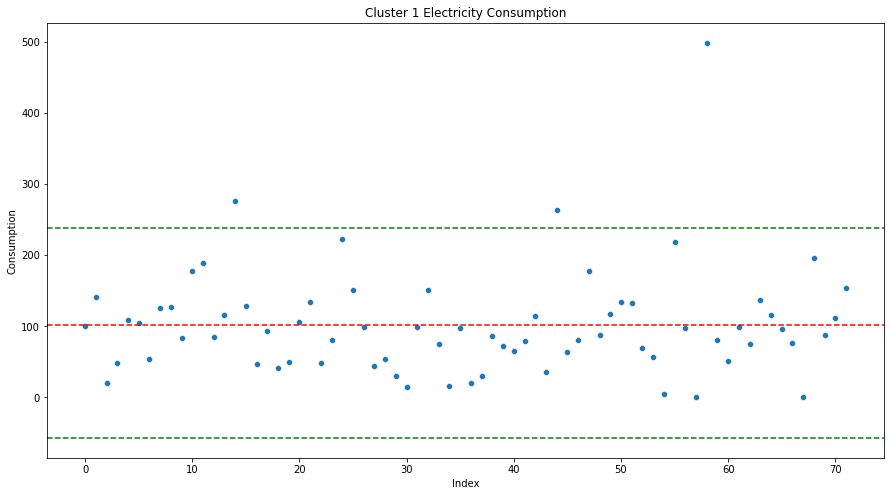

In [147]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x=range(len(cluster1)), y='consumption_y', data=cluster1)
plt.axhline(y=cluster1_mean, color='r', linestyle='--', label=f'Mean Consumption ({cluster1_mean})')
plt.axhline(y=lower_bound, color='g', linestyle='--', label=f'Lower Bound ({lower_bound})')
plt.axhline(y=upper_bound, color='g', linestyle='--', label=f'Upper Bound ({upper_bound})')
plt.title('Cluster 1 Electricity Consumption')
plt.xlabel('Index')
plt.ylabel('Consumption')
plt.show()

##### Cluster 2

In [148]:
cluster2_mean = cluster2['consumption_y'].mean().round(2)
cluster2_mean

141.85

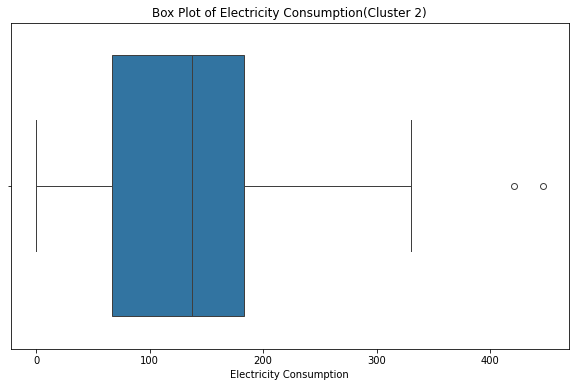

In [149]:
cluster2_cons = cluster2['consumption_y']

plt.figure(figsize=(10, 6))

sns.boxplot(x='consumption_y', data=cluster2)

plt.title('Box Plot of Electricity Consumption(Cluster 2)')
plt.xlabel('Electricity Consumption')

plt.show()

In [150]:
Q1 = cluster2_cons.quantile(0.25)
Q3 = cluster2_cons.quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers2 = cluster2[(cluster2_cons < lower_bound) | (cluster2_cons > upper_bound)]

print(f"Lower bound for outliers: {lower_bound}")
print(f"Upper bound for outliers: {upper_bound}")
outliers2

Lower bound for outliers: -106.11862500000035
Upper bound for outliers: 356.2783750000008


,serial,customerref,timestamp,obis,importkwh(kwh),exportkwh(kwh),importkvarh(kvarh),exportkvarh(kvarh),phaseainstcurrent(a),phasebinstcurrent(a),...,concrete_mixture_machine_availability,hair_cutting_machine_availability,generator_battery_availability,bouth_availability,grill_availability,la_unique_id,datetime_y,consumption_y,3Cluster,4Cluster
18,21301180,208108307,1.696100e+12,LP,4420.483,2787.737,324.6440,236.108,0.139,1.796,...,0.0,0.0,0.0,0.0,0.0,10208108307,2023-11-30,447.001,2,2
91,22733873,302971108,1.696700e+12,LP,17.944,0.000,503.7511,3548.147,1.306,0.291,...,0.0,0.0,0.0,0.0,0.0,10302971108,2023-11-30,420.932,2,2


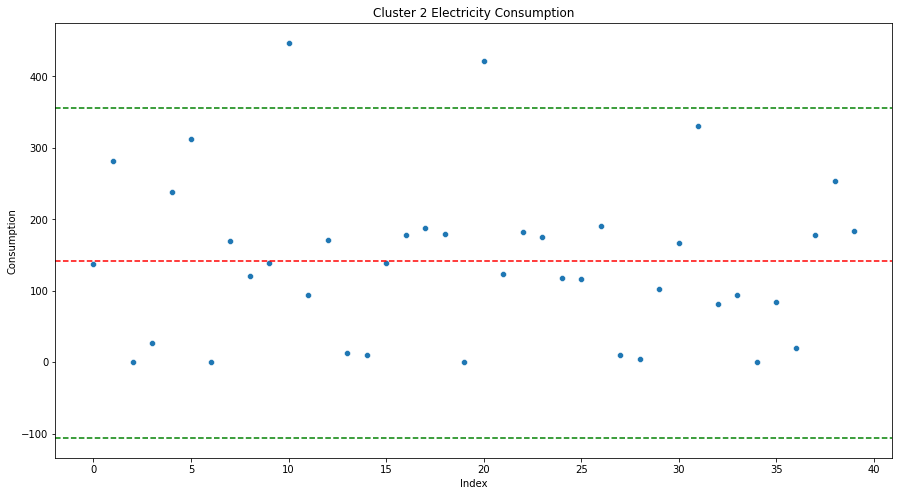

In [151]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x=range(len(cluster2)), y='consumption_y', data=cluster2)
plt.axhline(y=cluster2_mean, color='r', linestyle='--', label=f'Mean Consumption ({cluster2_mean})')
plt.axhline(y=lower_bound, color='g', linestyle='--', label=f'Lower Bound ({lower_bound})')
plt.axhline(y=upper_bound, color='g', linestyle='--', label=f'Upper Bound ({upper_bound})')
plt.title('Cluster 2 Electricity Consumption')
plt.xlabel('Index')
plt.ylabel('Consumption')
plt.show()

##### Cluster 3

In [152]:
# cluster3_mean = cluster3['consumption_y'].mean().round(2)
# cluster3_mean

In [153]:
# cluster3_cons = cluster3['consumption_y']

# plt.figure(figsize=(10, 6))

# sns.boxplot(x='consumption_y', data=cluster3)

# plt.title('Box Plot of Electricity Consumption(Cluster 3)')
# plt.xlabel('Electricity Consumption')

# plt.show()

In [154]:
# Q1 = cluster3_cons.quantile(0.25)
# Q3 = cluster3_cons.quantile(0.75)

# IQR = Q3 - Q1

# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# outliers3 = cluster3[(cluster3_cons < lower_bound) | (cluster3_cons > upper_bound)]

# print(f"Lower bound for outliers: {lower_bound}")
# print(f"Upper bound for outliers: {upper_bound}")
# outliers3

In [155]:
# plt.figure(figsize=(15, 8))
# sns.scatterplot(x=range(len(cluster3)), y='consumption_y', data=cluster3)
# plt.axhline(y=cluster3_mean, color='r', linestyle='--', label=f'Mean Consumption ({cluster3_mean})')
# plt.axhline(y=lower_bound, color='g', linestyle='--', label=f'Lower Bound ({lower_bound})')
# plt.axhline(y=upper_bound, color='g', linestyle='--', label=f'Upper Bound ({upper_bound})')
# plt.title('Cluster 3 Electricity Consumption')
# plt.xlabel('Index')
# plt.ylabel('Consumption')
# plt.show()

### Summary

In [156]:
print(f'Cluster 0 Mean Consumption: {cluster0_mean}')
print(f'Cluster 1 Mean Consumption: {cluster1_mean}')
print(f'Cluster 2 Mean Consumption: {cluster2_mean}')
# print(f'Cluster 3 Mean Consumption: {cluster3_mean}')

Cluster 0 Mean Consumption: 73.13
Cluster 1 Mean Consumption: 101.8
Cluster 2 Mean Consumption: 141.85
